In [17]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import centroid, fcluster
from scipy.spatial.distance import pdist
import scipy.spatial.distance as sdist
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import manhattan_distances


pyplot.show()

Load data from csv file

In [1]:
df = pd.read_csv ('iris.csv', index_col='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [416]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [417]:
df.loc[df.Species == 'Iris-setosa', 'Species'] = 0
df.loc[df.Species == 'Iris-versicolor', 'Species'] = 1
df.loc[df.Species == 'Iris-virginica', 'Species'] = 1
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [418]:
df_true = df['Species']
df = df.drop(['Species'], axis=1)

# K-means

Implementation

In [419]:
y_kmeans = KMeans(n_clusters=4).fit(df)

# Предсказание на всем наборе данных
kmeans_predictions = y_kmeans.predict(df)

# Выводим предсказания
print(kmeans_predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 2 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 0 3 0 0 0 0 2 0 0 0 3
 3 0 3 3 0 0 0 0 3 0 3 0 3 0 0 3 3 0 0 0 0 0 3 3 0 0 0 3 0 0 0 3 0 0 0 3 3
 0 3]


In [420]:
df_kmeans = df    # df_kmeans is a dafaframe for k-means clustarization 
df_kmeans['cluster'] = y_kmeans.labels_

Visualization

Text(0.5, 1, 'Clustering')

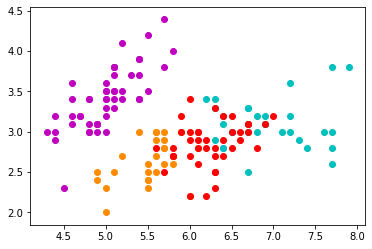

In [421]:
plt.figure()

plt.scatter(df_kmeans[df_kmeans['cluster'] == 0]['SepalLengthCm'],
            df_kmeans[df_kmeans['cluster'] == 0]['SepalWidthCm'],
            color = 'c')

plt.scatter(df_kmeans[df_kmeans['cluster'] == 1]['SepalLengthCm'],
            df_kmeans[df_kmeans['cluster'] == 1]['SepalWidthCm'],
            color = 'm')

plt.scatter(df_kmeans[df_kmeans['cluster'] == 2]['SepalLengthCm'],
            df_kmeans[df_kmeans['cluster'] == 2]['SepalWidthCm'],
            color = 'darkorange')
plt.scatter(df_kmeans[df_kmeans['cluster'] == 3]['SepalLengthCm'],
            df_kmeans[df_kmeans['cluster'] == 3]['SepalWidthCm'],
            color = 'r')
ax.set_title('Clustering')

Text(0.5, 1, 'Clustering')

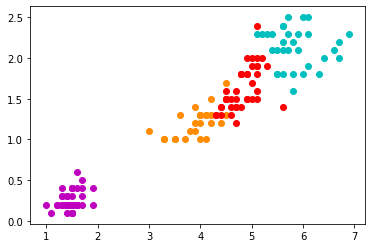

In [422]:
plt.figure()

plt.scatter(df_kmeans[df_kmeans['cluster'] == 0]['PetalLengthCm'],
            df_kmeans[df_kmeans['cluster'] == 0]['PetalWidthCm'],
            color = 'c')

plt.scatter(df_kmeans[df_kmeans['cluster'] == 1]['PetalLengthCm'],
            df_kmeans[df_kmeans['cluster'] == 1]['PetalWidthCm'],
            color = 'm')

plt.scatter(df_kmeans[df_kmeans['cluster'] == 2]['PetalLengthCm'],
            df_kmeans[df_kmeans['cluster'] == 2]['PetalWidthCm'],
            color = 'darkorange')
plt.scatter(df_kmeans[df_kmeans['cluster'] == 3]['PetalLengthCm'],
            df_kmeans[df_kmeans['cluster'] == 3]['PetalWidthCm'],
            color = 'r')
ax.set_title('Clustering')

Metrics

Euclidean metric

In [423]:
centroids = y_kmeans.cluster_centers_
dists = pd.DataFrame(
    sdist.cdist(df_kmeans[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], centroids), 
    columns=['euc_dist_{}'.format(i) for i in range(len(centroids))],
    index=df_kmeans.index)
df_kmeans = pd.concat([df_kmeans, dists], axis=1)

df_kmeans.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster,euc_dist_0,euc_dist_1,euc_dist_2,euc_dist_3
Id,,,,,,,,,
1,5.1,3.5,1.4,0.2,1,5.191298,0.146942,2.923859,3.929011
2,4.9,3.0,1.4,0.2,1,5.250198,0.438169,2.854387,3.942478
3,4.7,3.2,1.3,0.2,1,5.413775,0.412301,3.024606,4.112801
4,4.6,3.1,1.5,0.2,1,5.288923,0.518837,2.863132,3.976258
5,5.0,3.6,1.4,0.2,1,5.235655,0.197970,2.971235,3.977013


In [424]:
centroids

array([[6.9125    , 3.1       , 5.846875  , 2.13125   ],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [6.2525    , 2.855     , 4.815     , 1.625     ]])

Manhattan metric

In [426]:
man_dist = manhattan_distances(df_kmeans[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], centroids, sum_over_features=False)
df_man=pd.DataFrame(man_dist,columns=['man_dist_1','man_dist_2','man_dist_3','man_dist_4'])
df_kmeans = pd.concat([df_kmeans, df_man], axis=1)
df_man.head()

,man_dist_1,man_dist_2,man_dist_3,man_dist_4
0,1.812500,0.400000,4.446875,1.931250
1,0.094000,0.082000,0.064000,0.044000
2,0.432143,0.864286,2.560714,1.028571
3,1.152500,0.645000,3.415000,1.425000
4,2.012500,0.100000,4.446875,1.931250


Indicators of the splitting quality

In [427]:
#Homogeneity metric

from sklearn.metrics.cluster import homogeneity_score
homogeneity_score(df_true, kmeans_predictions)

1.0000000000000002

In [428]:
#Rand index

from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(df_true, kmeans_predictions)

0.43871946945269025

In [429]:
#Mutual Information based scores

from sklearn.metrics import adjusted_mutual_info_score
adjusted_mutual_info_score(df_true, kmeans_predictions)  

C:\Anac\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


0.4634640605825921

In [430]:
#Fowlkes-Mallows scores
from sklearn.metrics import fowlkes_mallows_score
fowlkes_mallows_score(df_true, kmeans_predictions) 

0.6828138969102527

# Agglomerative Clustering

Implementation

In [431]:
agglomerative_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward').fit(df)

# Предсказание на всем наборе данных
agglomerative_predictions = agglomerative_model.fit(df)
labels = agglomerative_model.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2,
       3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0,
       2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2], dtype=int64)

In [432]:
df_agglomer = df    # df_agglomerative is a dafaframe for k-means clustarization 
df_agglomer['cluster'] = agglomerative_model.labels_
df_agglomer.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
Id,,,,,
1,5.1,3.5,1.4,0.2,1
2,4.9,3.0,1.4,0.2,1
3,4.7,3.2,1.3,0.2,1
4,4.6,3.1,1.5,0.2,1
5,5.0,3.6,1.4,0.2,1


Visualization

Text(0.5, 1, 'Clustering')

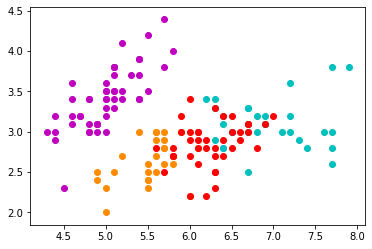

In [433]:
plt.figure()

plt.scatter(df_kmeans[df_kmeans['cluster'] == 0]['SepalLengthCm'],
            df_kmeans[df_kmeans['cluster'] == 0]['SepalWidthCm'],
            color = 'c')

plt.scatter(df_kmeans[df_kmeans['cluster'] == 1]['SepalLengthCm'],
            df_kmeans[df_kmeans['cluster'] == 1]['SepalWidthCm'],
            color = 'm')

plt.scatter(df_kmeans[df_kmeans['cluster'] == 2]['SepalLengthCm'],
            df_kmeans[df_kmeans['cluster'] == 2]['SepalWidthCm'],
            color = 'darkorange')
plt.scatter(df_kmeans[df_kmeans['cluster'] == 3]['SepalLengthCm'],
            df_kmeans[df_kmeans['cluster'] == 3]['SepalWidthCm'],
            color = 'r')
ax.set_title('Clustering')

Text(0.5, 1, 'Clustering')

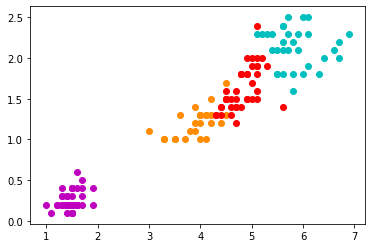

In [434]:
plt.figure()

plt.scatter(df_kmeans[df_kmeans['cluster'] == 0]['PetalLengthCm'],
            df_kmeans[df_kmeans['cluster'] == 0]['PetalWidthCm'],
            color = 'c')

plt.scatter(df_kmeans[df_kmeans['cluster'] == 1]['PetalLengthCm'],
            df_kmeans[df_kmeans['cluster'] == 1]['PetalWidthCm'],
            color = 'm')

plt.scatter(df_kmeans[df_kmeans['cluster'] == 2]['PetalLengthCm'],
            df_kmeans[df_kmeans['cluster'] == 2]['PetalWidthCm'],
            color = 'darkorange')
plt.scatter(df_kmeans[df_kmeans['cluster'] == 3]['PetalLengthCm'],
            df_kmeans[df_kmeans['cluster'] == 3]['PetalWidthCm'],
            color = 'r')
ax.set_title('Clustering')

Metrics

Euclidean metric

In [435]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
clf = NearestCentroid()
clf.fit(df_agglomer[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], labels)
agglomer_centroids = clf.centroids_
agglomer_centroids

array([[6.9125    , 3.1       , 5.846875  , 2.13125   ],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.2525    , 2.855     , 4.815     , 1.625     ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143]])

In [436]:
dists = pd.DataFrame(
    sdist.cdist(df_agglomer[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], agglomer_centroids), 
    columns=['euc_dist_{}'.format(i) for i in range(len(agglomer_centroids))],
    index=df_agglomer.index)
df_agglomer = pd.concat([df_agglomer, dists], axis=1)

df_agglomer.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster,euc_dist_0,euc_dist_1,euc_dist_2,euc_dist_3
Id,,,,,,,,,
1,5.1,3.5,1.4,0.2,1,5.191298,0.146942,3.929011,2.923859
2,4.9,3.0,1.4,0.2,1,5.250198,0.438169,3.942478,2.854387
3,4.7,3.2,1.3,0.2,1,5.413775,0.412301,4.112801,3.024606
4,4.6,3.1,1.5,0.2,1,5.288923,0.518837,3.976258,2.863132
5,5.0,3.6,1.4,0.2,1,5.235655,0.197970,3.977013,2.971235


Manhattan metric

In [437]:
man_dist_agglomer = manhattan_distances(df_agglomer[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], agglomer_centroids, sum_over_features=False)
df_man_agglomer=pd.DataFrame(man_dist_agglomer,columns=['man_dist_1','man_dist_2','man_dist_3','man_dist_4'])
df_agglomer = pd.concat([df_agglomer, df_man_agglomer], axis=1)
df_man_agglomer.head()

,man_dist_1,man_dist_2,man_dist_3,man_dist_4
0,1.812500,0.400000,4.446875,1.931250
1,0.094000,0.082000,0.064000,0.044000
2,1.152500,0.645000,3.415000,1.425000
3,0.432143,0.864286,2.560714,1.028571
4,2.012500,0.100000,4.446875,1.931250


Indicators of the splitting quality 

In [438]:
#Homogeneity metric

from sklearn.metrics.cluster import homogeneity_score
homogeneity_score(df_true, labels)

1.0

In [439]:
#Rand index

from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(df_true, labels)

0.43871946945269025

In [440]:
#Mutual Information based scores

from sklearn.metrics import adjusted_mutual_info_score
adjusted_mutual_info_score(df_true, labels)  

C:\Anac\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


0.46346406058259204

In [441]:
#Fowlkes-Mallows scores

from sklearn.metrics import fowlkes_mallows_score
fowlkes_mallows_score(df_true, labels) 

0.6828138969102527

# KMedoids (non-hierarchical)

Implementation

In [442]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=4, random_state=0).fit(df)
y_kmedoids = kmedoids.predict(df)
y_kmedoids

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3,
       0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 2, 3, 2, 2, 2, 2, 0, 2, 2, 2,
       3, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3], dtype=int64)

In [443]:
df_kmedoids = df    # df_kmeans is a dafaframe for k-means clustarization 
df_kmedoids['cluster'] = y_kmedoids
df_kmedoids.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
Id,,,,,
1,5.1,3.5,1.4,0.2,1
2,4.9,3.0,1.4,0.2,1
3,4.7,3.2,1.3,0.2,1
4,4.6,3.1,1.5,0.2,1
5,5.0,3.6,1.4,0.2,1


Visualization

Text(0.5, 1, 'Clustering')

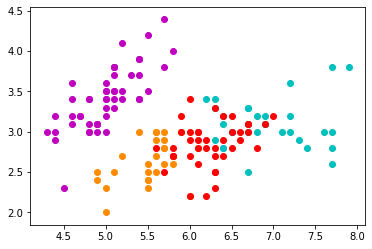

In [444]:
plt.figure()

plt.scatter(df_kmeans[df_kmeans['cluster'] == 0]['SepalLengthCm'],
            df_kmeans[df_kmeans['cluster'] == 0]['SepalWidthCm'],
            color = 'c')

plt.scatter(df_kmeans[df_kmeans['cluster'] == 1]['SepalLengthCm'],
            df_kmeans[df_kmeans['cluster'] == 1]['SepalWidthCm'],
            color = 'm')

plt.scatter(df_kmeans[df_kmeans['cluster'] == 2]['SepalLengthCm'],
            df_kmeans[df_kmeans['cluster'] == 2]['SepalWidthCm'],
            color = 'darkorange')
plt.scatter(df_kmeans[df_kmeans['cluster'] == 3]['SepalLengthCm'],
            df_kmeans[df_kmeans['cluster'] == 3]['SepalWidthCm'],
            color = 'r')
ax.set_title('Clustering')

Text(0.5, 1, 'Clustering')

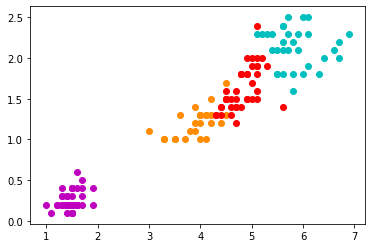

In [445]:
plt.figure()

plt.scatter(df_kmeans[df_kmeans['cluster'] == 0]['PetalLengthCm'],
            df_kmeans[df_kmeans['cluster'] == 0]['PetalWidthCm'],
            color = 'c')

plt.scatter(df_kmeans[df_kmeans['cluster'] == 1]['PetalLengthCm'],
            df_kmeans[df_kmeans['cluster'] == 1]['PetalWidthCm'],
            color = 'm')

plt.scatter(df_kmeans[df_kmeans['cluster'] == 2]['PetalLengthCm'],
            df_kmeans[df_kmeans['cluster'] == 2]['PetalWidthCm'],
            color = 'darkorange')
plt.scatter(df_kmeans[df_kmeans['cluster'] == 3]['PetalLengthCm'],
            df_kmeans[df_kmeans['cluster'] == 3]['PetalWidthCm'],
            color = 'r')
ax.set_title('Clustering')

Metrics

Euclidean metric

In [446]:
clf_kmedoids = NearestCentroid()
clf_kmedoids.fit(df_kmedoids[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], y_kmedoids)
kmedoids_centroids = clf_kmedoids.centroids_
kmedoids_centroids

array([[5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.9125    , 3.1       , 5.846875  , 2.13125   ],
       [6.2525    , 2.855     , 4.815     , 1.625     ]])

In [448]:
dist_kmed = pd.DataFrame(
    sdist.cdist(df_kmedoids[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], kmedoids_centroids), 
    columns=['euc_dist_{}'.format(i) for i in range(len(kmedoids_centroids))],
    index=df_kmedoids.index)
df_kmedoids = pd.concat([df_kmedoids, dist_kmed], axis=1)

df_kmedoids.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster,euc_dist_0,euc_dist_1,euc_dist_2,euc_dist_3
Id,,,,,,,,,
1,5.1,3.5,1.4,0.2,1,2.923859,0.146942,5.191298,3.929011
2,4.9,3.0,1.4,0.2,1,2.854387,0.438169,5.250198,3.942478
3,4.7,3.2,1.3,0.2,1,3.024606,0.412301,5.413775,4.112801
4,4.6,3.1,1.5,0.2,1,2.863132,0.518837,5.288923,3.976258
5,5.0,3.6,1.4,0.2,1,2.971235,0.197970,5.235655,3.977013


Manhattan metric

In [449]:
man_dist_kmedoids = manhattan_distances(df_kmedoids[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], kmedoids_centroids, sum_over_features=False)
df_man_kmedoids=pd.DataFrame(man_dist_kmedoids,columns=['man_dist_1','man_dist_2','man_dist_3','man_dist_4'])
df_kmedoids = pd.concat([df_kmedoids, df_man_kmedoids], axis=1)
df_man_kmedoids.head()

,man_dist_1,man_dist_2,man_dist_3,man_dist_4
0,0.432143,0.864286,2.560714,1.028571
1,0.094000,0.082000,0.064000,0.044000
2,1.812500,0.400000,4.446875,1.931250
3,1.152500,0.645000,3.415000,1.425000
4,0.632143,0.364286,2.560714,1.028571


Indicators of the splitting quality 

In [450]:
#Homogeneity metric

from sklearn.metrics.cluster import homogeneity_score
homogeneity_score(df_true, labels)

1.0

In [451]:
#Rand index
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(df_true, labels)

0.43871946945269025

In [452]:
#Mutual Information based scores

from sklearn.metrics import adjusted_mutual_info_score
adjusted_mutual_info_score(df_true, labels)  

C:\Anac\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


0.46346406058259204

In [453]:
#Fowlkes-Mallows scores

from sklearn.metrics import fowlkes_mallows_score
fowlkes_mallows_score(df_true, labels) 

0.6828138969102527

# Dendrograms

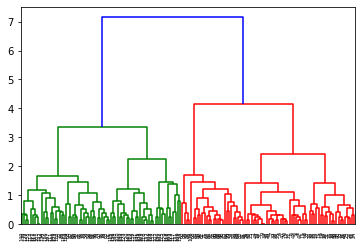

In [454]:
from scipy.cluster.hierarchy import linkage, dendrogram
samples = df.values
varieties = list(df)
mergings = linkage(samples, method='complete')

mergings = linkage(samples, method='complete')
plt.figure()
dn = dendrogram(mergings,leaf_rotation=90.)

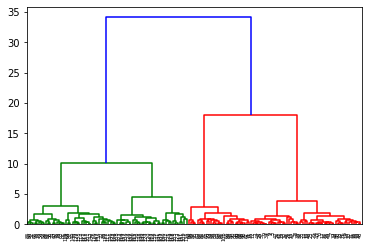

In [455]:
dendrogram = sch.dendrogram(sch.linkage(samples, method='ward'),leaf_rotation=90.)